## Import

In [120]:
import pandas as pd
import numpy as np
import math
import os 
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import datetime

## Data Pre-processing

In [ ]:
books = pd.read_csv('books.csv')

In [ ]:
authors = pd.read_json("lighter_authors.json", lines=True)

## [RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

*  You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?
*  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.
*  What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
*  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.


### 4.1

In [ ]:
authors['name'] = authors['name'].str.lower().str.strip()
duplicate_authors = authors['name'].value_counts()
eponymous_authors = duplicate_authors[duplicate_authors > 1]


print(f"There are {eponymous_authors.shape[0]} Authors who has 2 occurances in the dataset")
for author, occur in eponymous_authors.items():
    print(author)


There are 47 Authors who has 2 occurances in the dataset
jacques mallet du pan
boris zakhoder
david  nelson
m.k. graff
type-moon
george  franklin
john  macgregor
محمد نجيب
brian
yordan yovkov
caroline miller
peter    green
peter      marshall
peter  davies
cicerón
dimitar dimov
daco
mike   lee
joseph fink
julie  campbell
martin    shaw
peter green
erin  bedford
peter king
paul graham
isabella
william messner-loebs
mac
james c.l. carson
marie-anne de la trémoille
jean-sébastien-eugène julia de fontenelle
catherine   jones
hildegard von bingen
robert w. sullivan iv
john  mole
小野不由美
james kent
malcolm macfarlane
chris lynch
christopher phillips
peter  marshall
jorge molina
jackson butch guice
katherine mercurio gotthardt
david yates
paul      davies
q. hayashida


You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

**No this is not true, there are 47 epomymous authors in the dataset.**

In [ ]:
authors = authors.drop_duplicates(subset=['name'], keep='first')


### 4.2

In [ ]:
def author_books(author_id: pd.Series):
    d = {}
    for id in tqdm(list(set(books.author_id.values))[:]):
        d[id] = list(set(books[books['author_id'] == id]['title'].values))
    return d

author_books_title = author_books(books.author_id)
    

100%|██████████| 259609/259609 [09:49<00:00, 440.55it/s]


In [ ]:
author_books_title

{4: ["Life, the Universe and Everything (Hitchhiker's Guide to the Galaxy #3)",
  "The Hitchhiker's Guide To The Galaxy (Hitchhiker's Guide to the Galaxy, #1)",
  'Elimäen tarkoitus',
  "Η ζωή, το σύμπαν και τα πάντα (Hitchiker's Guide, #3)",
  "The More Than Complete Hitchhiker's Guide (Hitchhiker's Guide, #1-4 + short story)",
  "Life, the Universe and Everything (Hitchhiker's Guide #3)",
  'Duga, mračna čajanka duše',
  'Den Komplette Guide til Galaksen',
  'Γυρίστε τον γαλαξία με ωτοστόπ',
  'Ruhun Uzun Karanlık Çay Saati (Dirk Gently, #2)',
  'Het leven, het heelal en de rest',
  'Elämä, maailmankaikkeus - ja kaikki',
  'The Salmon of Doubt',
  'The Long Dark Tea-Time Of The Soul (Dirk Gently #2)',
  'Μάλλον ακίνδυνος',
  'Autostopem przez galaktykę',
  'ชีวิต จักรวาล และทุกสรรพสิ่ง (Life, the Universe, and Everything)',
  'Douglas Adams Live in Concert',
  "Het transgalactische liftershandboek (Hitchhiker's Guide to the Galaxy #1)",
  'Dirk Gentlyn holistinen etsivätoimisto (Dirk

In [ ]:
top_authors_ids = authors.sort_values('average_rating', ascending=False)[:40]['id'].values

In [ ]:
books_title = []
i = 0
for  author_id in top_authors_ids:
    if author_id in author_books_title.keys():
        books_title.extend(author_books_title[author_id])
        i += 1
    else:
        continue
    if i == 20:
        break

In [ ]:
len_d = {}
for title in books_title:
    len_d[title] = len(title)

In [ ]:
sorted_len_d = sorted(len_d.items(), key = lambda x: -x[1])
long_title = sorted_len_d[0]
small_title = sorted_len_d[-1]

### 4.3

In [ ]:
print(long_title)
print(small_title)

("A compleat refutation of the statements of Lord Moira respecting Ireland; being the entire speech of the Earl of Clare, Lord Chancellor of Ireland, in the House of Peers of that kingdom, Monday, February 19, 1798, on Lord Moira's motion, ...", 241)
('Bomb', 4)


In [ ]:
total_titles = list(set(books['title'].values))

In [ ]:
total_titles.sort()

In [ ]:
total_len_d = {}
for title in total_titles:
    total_len_d[title] = len(title)

In [ ]:
sorted_total_len_d = sorted(total_len_d.items(), key = lambda x: -x[1])
total_long_title = sorted_total_len_d[0]
total_small_title = sorted_total_len_d[-2]

In [ ]:
print(total_long_title)
print(total_small_title)

('(� 695 Bis 1084): Aus: Grundri� Der Vergleichenden Grammatik Der Indogermanischen Sprachen: Kurzgefa�te Darstellung Der Geschichte Des Altindischen, Altiranischen (Avestischen U. Altpersischen), Altarmenischen, Altgriechischen, Albanesischen, Lateinisc...', 255)
('혀', 1)


What is the longest book title among the books of the top 20 authors regarding their average rating? 

**Longest Title** is: "A compleat refutation of the statements of Lord Moira respecting Ireland; being the entire speech of the Earl of Clare, Lord Chancellor of Ireland, in the House of Peers of that kingdom, Monday, February 19, 1798, on Lord Moira's motion, ...", **241 characters**


Is it the longest book title overall?
**No** The longest title overall: '(� 695 Bis 1084): Aus: Grundri� Der Vergleichenden Grammatik Der Indogermanischen Sprachen: Kurzgefa�te Darstellung Der Geschichte Des Altindischen, Altiranischen (Avestischen U. Altpersischen), Altarmenischen, Altgriechischen, Albanesischen, Lateinisc...', **255 characters**





### 4.4
The shortest book title overall is: "혀", **1 character**

## [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.

*  Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

*  Have they published any series of books? If any, extract the longest series name among these authors.

*  How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

*  Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:

### 5.1

In [ ]:
authors['books_count'] = authors['book_ids'].apply(lambda x: len(x))

In [ ]:
authors.sort_values('fans_count', ascending=False)[['name', 'fans_count', 'books_count']].head(10)

name  fans_count  books_count
1017           Stephen King      766035         1529
169374        Veronica Roth      455358           57
6397            Bill  Gates      446876           12
205870       Colleen Hoover      356633           57
4537           Rick Riordan      339346          172
1161        James Patterson      317040          747
100166           John Green      282537           57
3818    Neil deGrasse Tyson      277850           52
27110       Cassandra Clare      238560          203
32358          Mindy Kaling      234647           16

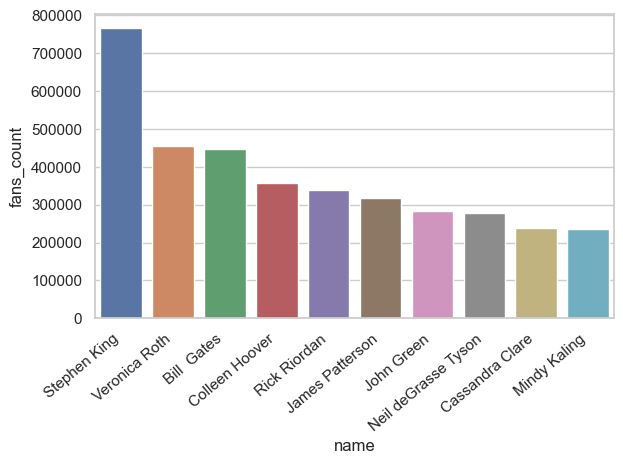

In [ ]:
#plot the table above
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="name", y="fans_count", data=authors.sort_values('fans_count', ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


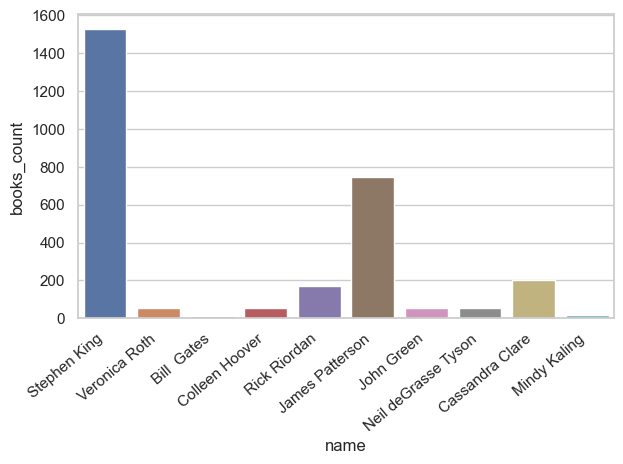

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="name", y="books_count", data=authors.sort_values('fans_count', ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Answer**: Analyzing the graphs above, we can confidently say that Stephen King is the most influential author


### 5.2

In [ ]:
top10_authors = authors.sort_values('fans_count', ascending=False)[['name', 'id', 'fans_count', 'books_count']].head(10)

In [ ]:
top10_authors

name       id  fans_count  books_count
1017           Stephen King     3389      766035         1529
169374        Veronica Roth  4039811      455358           57
6397            Bill  Gates    23470      446876           12
205870       Colleen Hoover  5430144      356633           57
4537           Rick Riordan    15872      339346          172
1161        James Patterson     3780      317040          747
100166           John Green  1406384      282537           57
3818    Neil deGrasse Tyson    12855      277850           52
27110       Cassandra Clare   150038      238560          203
32358          Mindy Kaling   194416      234647           16

In [ ]:
series = {}
for id in top10_authors.id.values:
    author = top10_authors[top10_authors['id'] == id].name.values[0]
    series[author] = list(set(books[books.author_id == id]['series_name'].dropna().values))
series

{'Stephen King': ['The Stand (split volumes)',
  'قصص من العالم الآخر',
  'It (3 volumes)',
  'スティーヴン キングのIT (日本語)',
  'Dreamcatcher Split-Volume',
  'アンダー・ザ・ドーム',
  'The Stand (3 volumes)',
  'ドリームキャッチャー',
  'Horror Martínez Roca',
  'Duma Key Split-Volume',
  "Everything's Eventual [Japanese]",
  'Insomnia Split-Volume',
  'Danse macabre',
  'Night Visions',
  'Batman (1940-2011)',
  'The Shining Split-Volume',
  'The Dark Tower',
  'The Best American Short Stories',
  '暗黒の塔',
  'Under the Dome Split-Volume',
  'Scream Street',
  'The Talisman',
  'The Green Mile',
  'Pern (Chronological Order)',
  'The Stand: Graphic Novels',
  'Les Tommyknockers',
  'The Secretary of Dreams',
  'Pesadillas y alucinaciones',
  'Nightmares & Dreamscapes',
  'Skeleton Crew',
  'Bazaar',
  'It (2 volumes)',
  'The Dark Tower: Graphic Novels',
  'Bill Hodges Trilogy',
  '11/22/63',
  'Different Seasons',
  'The Shining'],
 'Veronica Roth': ['Divergent', 'Divergent Japanese Split-Volume Edition'],
 'Bill

In [ ]:
def longest_string(d):
    max_len = 0
    max_str = ''
    for key, values in d.items():
        for series in values:
            if len(series) > max_len:
                longest_series = series
                max_len = len(longest_series)
                author = key
    print(f'Author: {author}, Series: {longest_series}, Length: {max_len}')

longest_string(series)

Author: Rick Riordan, Series: Percy Jackson and the Olympians: The Graphic Novels, Length: 51


**Answer**: Author: Rick Riordan, Series: Percy Jackson and the Olympians: The Graphic Novels, Length: 51

### 5.3

In [ ]:
formats = {}
for id in top10_authors.id.values:
    author = top10_authors[top10_authors['id'] == id].name.values[0]
    formats[author] = list(set(books[books.author_id == id]['format'].dropna().values))
formats

{'Stephen King': ['Paperback &amp; Audio CD',
  'Loose Leaf',
  'Bolsillo',
  'Kindle',
  'MP3 CD',
  'Audio CD',
  'Fine Binding',
  'Kindle Edition',
  'Tapa blanda',
  'Preloaded Digital Audio Player with earbuds',
  'Hard Cover (gebonden)',
  'Audiobook',
  'Capa Mole',
  'Pamphlet',
  'Audio Cassette',
  'Audible.com',
  'Audible Audio',
  'Turtleback',
  'Leather Bound',
  'Preloaded Digital Audio Player',
  'Paperback',
  'Slipcased Hardcover',
  'جيبي',
  'MP3 on CD',
  'paperback',
  'Hardcover',
  'paper',
  'School &amp; Library Binding',
  'Unknown Binding',
  'Unbound',
  'CD-ROM',
  'Beterback',
  'Boxed Set',
  'Large Print',
  'Audio',
  'MP3 Book',
  'Paperback with flaps',
  'Audio Playaway',
  'Paperback and CD',
  'Rústica bolsillo',
  'Videocassette',
  '17 x 26',
  'Flipback',
  'Mass Market Paperback',
  'ebook',
  'Library Binding',
  'MP3',
  'Pocket',
  'Econo-clad',
  'Microsoft Reader Edition',
  'Dwarsligger',
  'audiobook'],
 'Veronica Roth': ['Unknown Bin

In [ ]:
import collections
formats_list = []
for author, format in formats.items():
        formats_list.extend(format)

c = collections.Counter(formats_list)
print(c)


Counter({'Audio CD': 10, 'Audiobook': 10, 'Paperback': 10, 'Hardcover': 10, 'ebook': 10, 'Kindle Edition': 9, 'Audible Audio': 9, 'MP3 CD': 7, 'Audio': 7, 'Mass Market Paperback': 7, 'Library Binding': 7, 'Audio Cassette': 4, 'Unknown Binding': 4, 'Broché': 4, 'Dwarsligger': 3, 'Nook': 3, 'Trade Paperback': 3, 'Preloaded Digital Audio Player': 2, 'paperback': 2, 'Large Print': 2, 'MP3 Book': 2, 'Flipback': 2, 'MP3': 2, 'Poche': 2, 'Paperback &amp; Audio CD': 1, 'Loose Leaf': 1, 'Bolsillo': 1, 'Kindle': 1, 'Fine Binding': 1, 'Tapa blanda': 1, 'Preloaded Digital Audio Player with earbuds': 1, 'Hard Cover (gebonden)': 1, 'Capa Mole': 1, 'Pamphlet': 1, 'Audible.com': 1, 'Turtleback': 1, 'Leather Bound': 1, 'Slipcased Hardcover': 1, 'جيبي': 1, 'MP3 on CD': 1, 'paper': 1, 'School &amp; Library Binding': 1, 'Unbound': 1, 'CD-ROM': 1, 'Beterback': 1, 'Boxed Set': 1, 'Paperback with flaps': 1, 'Audio Playaway': 1, 'Paperback and CD': 1, 'Rústica bolsillo': 1, 'Videocassette': 1, '17 x 26': 1, '

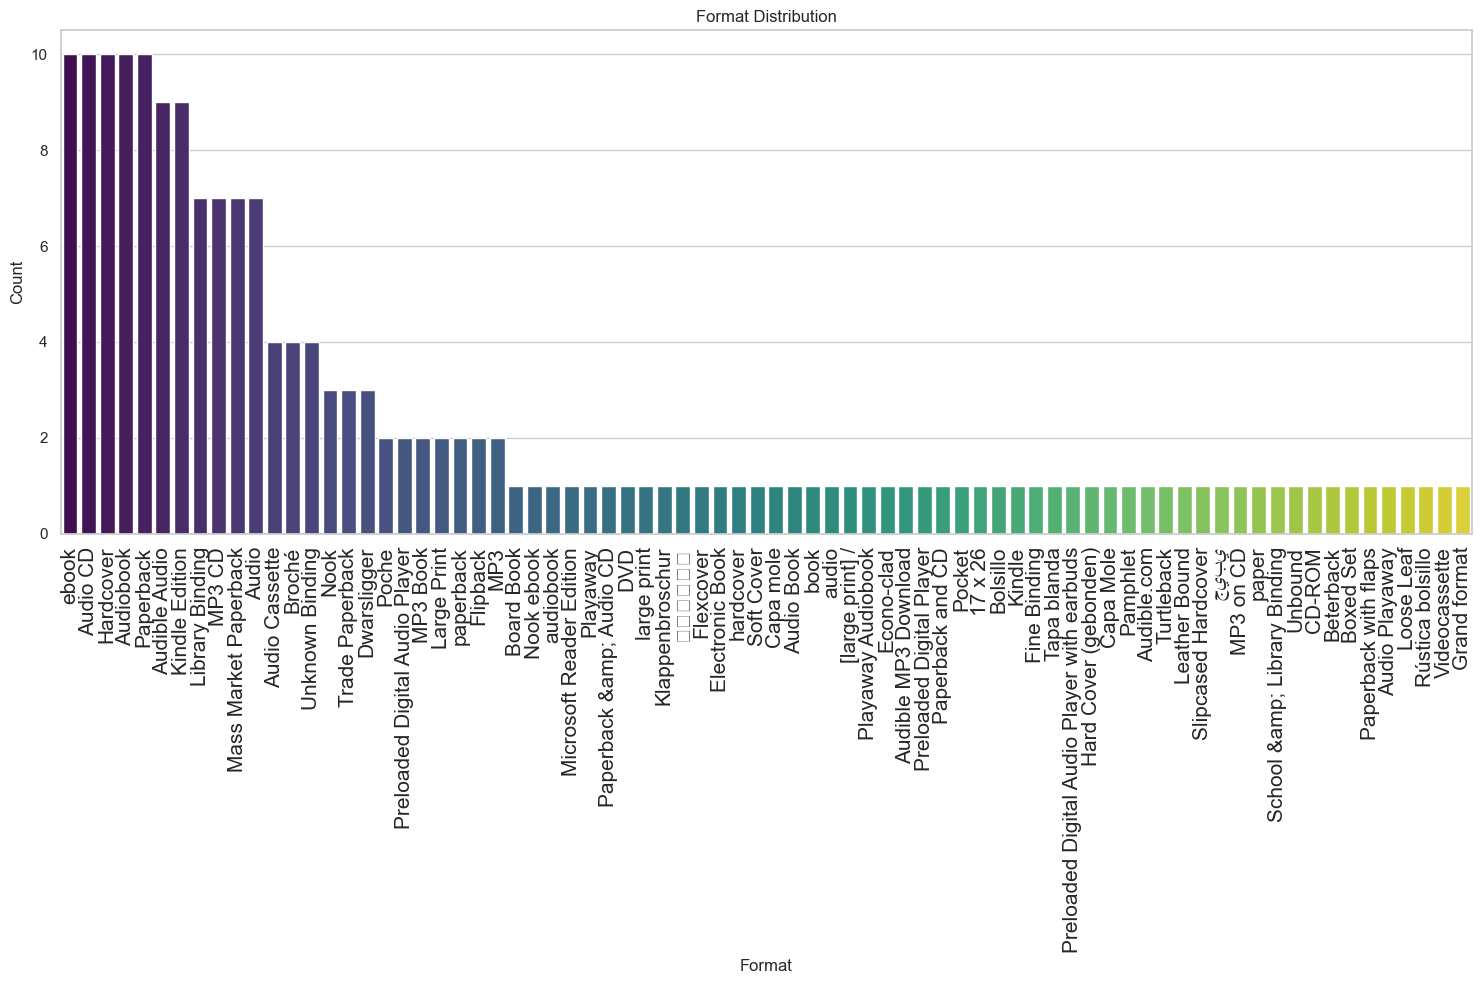

In [ ]:
data = {'Format': list(c.keys()), 'Count': list(c.values())}
df = pd.DataFrame(data)
df = df.sort_values('Count', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x="Format", y="Count", data=df, palette="viridis")
plt.title("Format Distribution")
plt.xlabel("Format")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize = 15 )
plt.tight_layout()
#ignore warnings


**Answer:** We can note on the graph, that the most influential authors have been published in different formats. The most common format is ebook, Paperback, Audio CD, Hardcover, Audiobook, Paperback. The least common format is related to Audio formats.

### 5.4

In [ ]:
authors = authors.dropna(subset=['gender'])


In [ ]:
majorities = authors[(authors['gender'] == 'male') | (authors['gender'] == 'female')]

In [ ]:
unknown =  authors[authors['gender'] != '']
unknown.shape

(248373, 12)

In [ ]:
majorities.groupby('gender').count()['id']

gender
female    109874
male      138166
Name: id, dtype: int64

In [ ]:
stats = majorities.groupby('gender').aggregate({'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'fans_count': 'mean'})
stats


average_rating  ratings_count  text_reviews_count  fans_count
gender                                                               
female        3.839920    6500.921246          507.011595  180.618336
male          3.606728    5367.513505          303.882554   95.806153

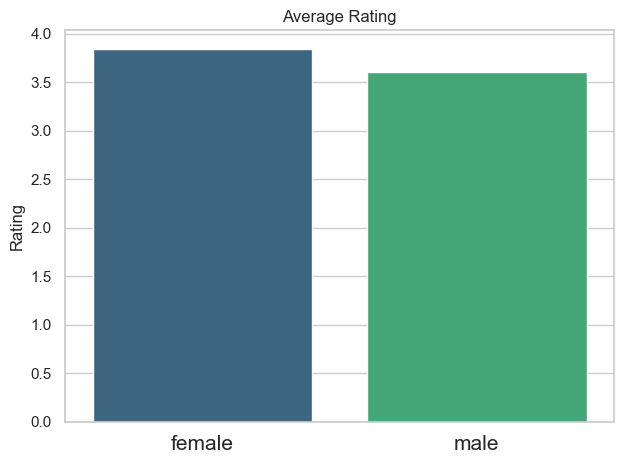

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x = stats.index, y = stats['average_rating'], palette="viridis")
plt.title("Average Rating")
plt.xlabel("")
plt.ylabel("Rating")
plt.xticks(rotation=0, fontsize = 15 )
plt.tight_layout()

In [ ]:
stats_T = stats[['ratings_count', 'text_reviews_count', 'fans_count']].transpose()
#plot the table above
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")


<Figure size 1500x1000 with 0 Axes>

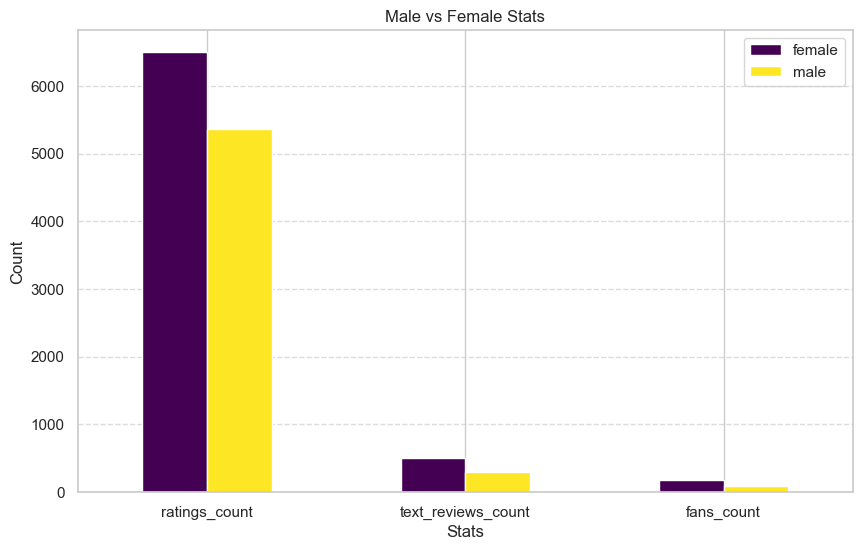

In [ ]:

ax = stats_T.plot(kind='bar', rot=0, colormap="viridis", figsize=(10, 6))
plt.title("Male vs Female Stats")
plt.xlabel("Stats")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Here, we can claim that female authors are slightly more popular than male authors. However the data is not balanced as there is difference in count size between male and female authors. Also, we should say that there are 248373 authors with unknown genders, and this is huge number that can affect the results.

We can do downsampling to balance the data. And see what results we will get.

In [ ]:
males = authors[authors['gender'] == 'male']
females = authors[authors['gender'] == 'female']


(109874, 12)

In [ ]:
males = authors[authors['gender'] == 'male']
females = authors[authors['gender'] == 'female']
males_sample = males.sample(females.shape[0], random_state=42)
sampled_data = pd.concat([females, males_sample], axis = 0)

In [ ]:
stats_2 = sampled_data.groupby('gender').aggregate({'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'fans_count': 'mean'})
stats_2


average_rating  ratings_count  text_reviews_count  fans_count
gender                                                               
female        3.839920    6500.921246          507.011595  180.618336
male          3.608071    5088.696816          291.139533   87.607978

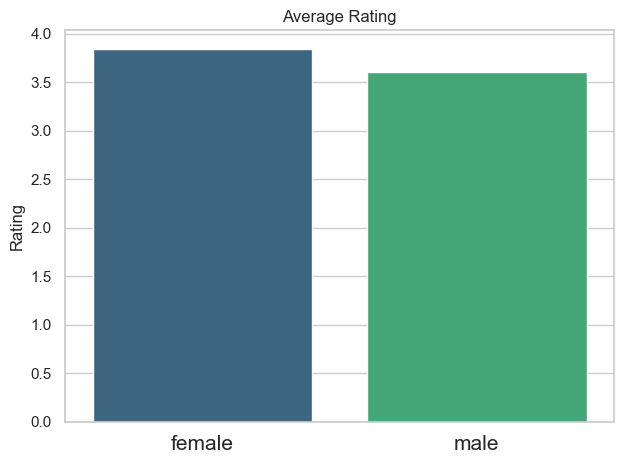

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x = stats_2.index, y = stats_2['average_rating'], palette="viridis")
plt.title("Average Rating")
plt.xlabel("")
plt.ylabel("Rating")
plt.xticks(rotation=0, fontsize = 15 )
plt.tight_layout()

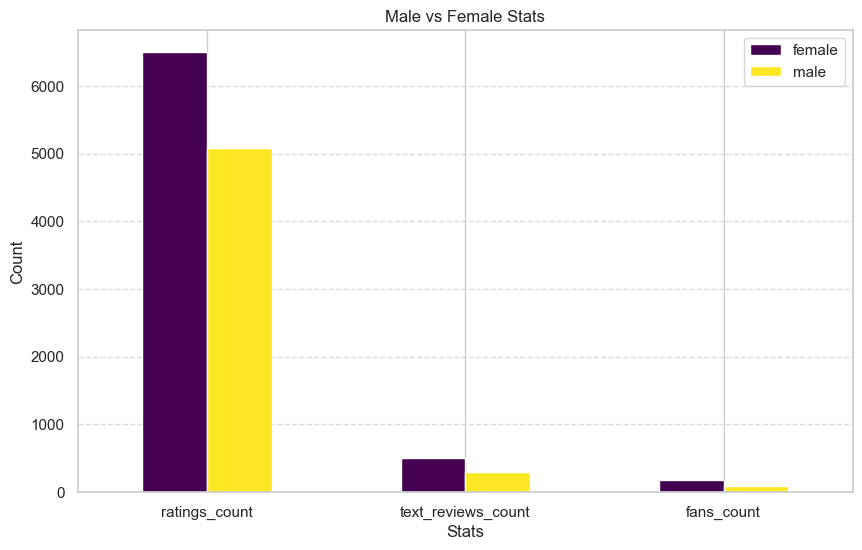

In [ ]:
stats_T_2 = stats_2[['ratings_count', 'text_reviews_count', 'fans_count']].transpose()
ax = stats_T_2.plot(kind='bar', rot=0, colormap="viridis", figsize=(10, 6))
plt.title("Male vs Female Stats")
plt.xlabel("Stats")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Even after we balanced the data, the main trends of male and female authors on researched metrics still remain the same.

In [ ]:
minorities = authors[~((authors['gender'] == 'male') | (authors['gender'] == 'female'))]

In [ ]:
minorities = minorities[minorities['gender'] != '']

In [ ]:
minorities.shape

(333, 12)

In [ ]:
minor_stats = minorities.describe().iloc[1, :]

In [ ]:
stats

average_rating  ratings_count  text_reviews_count  fans_count
gender                                                               
female        3.839920    6500.921246          507.011595  180.618336
male          3.606728    5367.513505          303.882554   95.806153

In [ ]:
minor_stats =pd.DataFrame(minor_stats).transpose()[['average_rating', 'ratings_count', 'text_reviews_count', 'fans_count']]
minor_stats.set_index(pd.Index(['Minorities']), inplace=True)


In [ ]:
total_stats = pd.concat([stats, minor_stats], axis = 0)

In [ ]:
total_stats

average_rating  ratings_count  text_reviews_count  fans_count
female            3.839920    6500.921246          507.011595  180.618336
male              3.606728    5367.513505          303.882554   95.806153
Minorities        3.930300    1357.168168          258.495495  121.204204

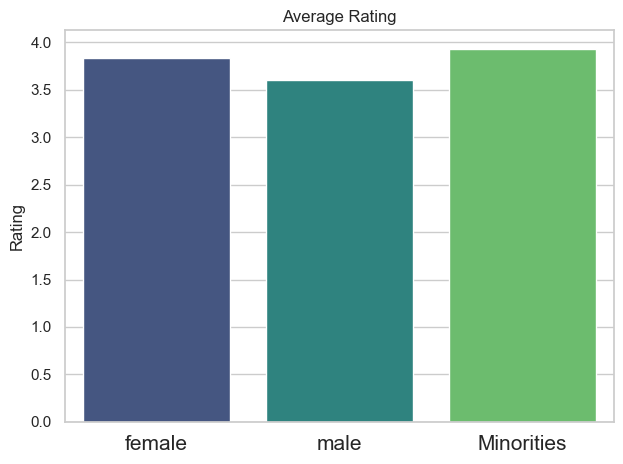

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x = total_stats.index, y = total_stats['average_rating'], palette="viridis")
plt.title("Average Rating")
plt.xlabel("")
plt.ylabel("Rating")
plt.xticks(rotation=0, fontsize = 15 )
plt.tight_layout()

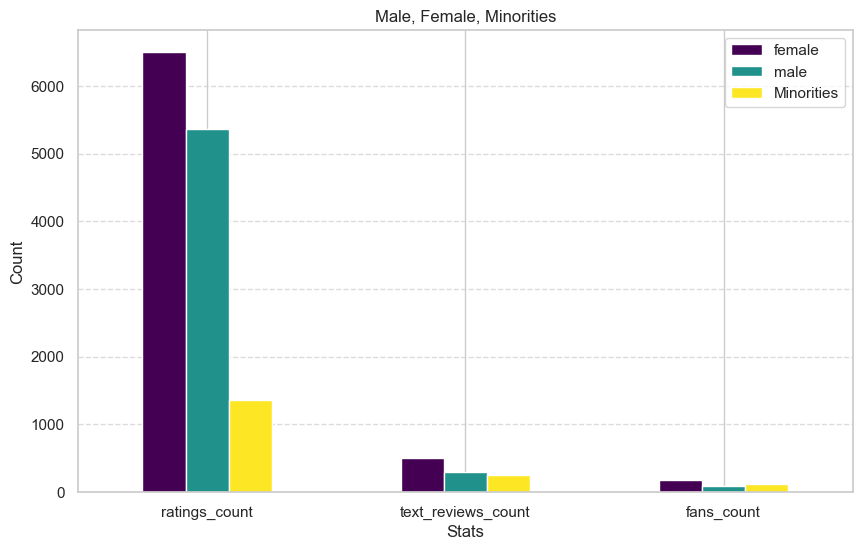

In [ ]:
total_stats_T = total_stats[['ratings_count', 'text_reviews_count', 'fans_count']].transpose()
ax = total_stats_T.plot(kind='bar', rot=0, colormap="viridis", figsize=(10, 6))
plt.title("Male, Female, Minorities")
plt.xlabel("Stats")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

It can be noticed, that Minorities have higher average rating that male and female authors. Also, averaged fans count of Minorities is higher than male's fans count. But again the data is not balanced, and the count size of minorities is extremely small (333), so we can't make any conclusions and be confident in them.

**Structural Bias???**

## [RQ6] For this question, consider the top 10 authors concerning the number of fans again.

*  Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
*  For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

### 6.1 
Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [98]:
top10_authors = authors.sort_values('fans_count', ascending=False).head(10)
top10_authors

ratings_count  average_rating  text_reviews_count  \
1017         15195579            4.04              608956   
169374        5739316            4.05              277033   
6397             9418            3.85                 562   
205870        2239503            4.24              240302   
4537          9144089            4.32              354145   
1161          6514711            3.98              333220   
100166        7186569            4.03              358221   
3818           175216            4.07               16300   
27110         7401435            4.24              416177   
32358          611045            3.88               34482   

                                                 work_ids  \
1017    [849585, 150259, 1742269, 3230869, 1552134, 46...   
169374  [13155899, 15524542, 15524549, 25457412, 19216...   
6397    [321174, 51432387, 314, 1479853, 60054895, 688...   
205870  [21389085, 43940889, 18602144, 24878172, 24878...   
4537    [3346751, 2377629, 43554, 4551489, 2936530, 10...   
1161    [3373984, 881425, 1711194, 1829521, 141228, 88...   
100166  [16827462, 919292, 3364505, 48658, 21576687, 6...   
3818    [52832605, 1204936, 23561, 16946049, 1323039, ...   
27110   [2267189, 3443248, 1575860, 6674837, 6948844, ...   
32358   [15237902, 41897766, 25273867, 60430209, 56458...   

                                                 book_ids  works_count  \
1017    [11588, 830502, 149267, 10614, 10592, 43615, 1...         1762   
169374  [13335037, 11735983, 18710190, 18126198, 13615...           57   
6397    [36603020, 39731947, 41619, 1081637, 41814307,...           12   
205870  [15717943, 27362503, 30333938, 17788401, 24445...           57   
4537    [28187, 2120932, 28186, 4556058, 561456, 77361...          172   
1161    [13145, 13148, 13137, 13152, 7494, 13139, 1313...          747   
100166  [11870085, 99561, 6442769, 49750, 35504431, 65...           57   
3818    [32191710, 20663770, 20663771, 20707975, 20663...           52   
27110   [256683, 3777732, 1582996, 7171637, 6752378, 1...          203   
32358   [10335308, 30268522, 52435702, 38887475, 35134...           16   

             id                 name  gender  \
1017       3389         Stephen King    male   
169374  4039811        Veronica Roth  female   
6397      23470          Bill  Gates           
205870  5430144       Colleen Hoover  female   
4537      15872         Rick Riordan    male   
1161       3780      James Patterson    male   
100166  1406384           John Green           
3818      12855  Neil deGrasse Tyson           
27110    150038      Cassandra Clare  female   
32358    194416         Mindy Kaling           

                                                image_url  \
1017    https://images.gr-assets.com/authors/136281414...   
169374  https://images.gr-assets.com/authors/158870727...   
6397    https://images.gr-assets.com/authors/160374454...   
205870  https://images.gr-assets.com/authors/146403224...   
4537    https://images.gr-assets.com/authors/160890657...   
1161    https://images.gr-assets.com/authors/146834720...   
100166  https://images.gr-assets.com/authors/135345230...   
3818    https://images.gr-assets.com/authors/153503709...   
27110   https://images.gr-assets.com/authors/127050203...   
32358   https://images.gr-assets.com/authors/144071858...   

                                                    about  fans_count  
1017    Stephen Edwin King was born the second son of ...      766035  
169374  Veronica Roth is the #1 New York Times best-se...      455358  
6397    Reading books is one of my favorite ways to le...      446876  
205870  International and #1 New York Times bestsellin...      356633  
4537    Rick Riordan is the #1 <i>New York Times</i> b...      339346  
1161    <a href="http://www.jamespatterson.com" rel="n...      317040  
100166  <i>Librarian Note: There is more than one auth...      282537  
3818    Neil deGrasse Tyson was born and raised in New...      277850  


In [99]:
def pub_data(date):
    date = str(date)
    if len(date) == 4:
        date = date + '-01-01'
    elif len(date) == 7:
        date = date +  '-01'
    elif len(date) != 10:
        return None
    return date

In [ ]:
books['publication_date'] = books['publication_date'].apply(lambda x: pub_data(x))

In [121]:
def timedelta_to_years(delta: datetime.timedelta) -> float:
        seconds_in_year = 365.25*24*60*60
        return delta.total_seconds() / seconds_in_year

In [140]:
def series_time_gap(author_id: int):
    # Assuming 'books' is your DataFrame
    books_author = books[(books['author_id'] == author_id) & 
                        (books['format'] == 'Hardcover') & 
                        (books['language'] == 'eng')].copy()

    books_author = books_author.drop_duplicates(subset=['title'], keep='first')

    books_author = books_author.dropna(subset=['publication_date'])

    # Filter series and calculate time gaps
    books_author_series = books_author[books_author['series_name'].notna()]
    series = books_author_series['series_name'].unique()
    if len(series) == 0:
        return None
    df_series = []

    for serie in series:
        books_author_serie = books_author_series[books_author_series['series_name'] == serie].copy()
        books_author_serie['publication_date'] = pd.to_datetime(books_author_serie['publication_date'], format='%Y-%m-%d')
        books_author_serie = books_author_serie.sort_values('publication_date', ascending=True)

        # Drop duplicates of 'series_position' within each series
        books_author_serie = books_author_serie.drop_duplicates(subset=['series_position'], keep='first')

        # Calculate the time gap between subsequent publications
        books_author_serie['time_gap'] = books_author_serie.groupby('series_name')['publication_date'].diff()
        

        books_author_serie = books_author_serie.dropna(subset = ['time_gap'])
        books_author_serie = books_author_serie[books_author_serie['time_gap'] != '0 days']
        df_series.append(books_author_serie)

    result_df = pd.concat(df_series, axis=0, ignore_index=True)

    if result_df.shape[0] == 0:
        return None

    # Calculate the mean time gap for all series
    mean_time_gap = result_df['time_gap'].mean()
    years_mean = timedelta_to_years(mean_time_gap)
    return round(years_mean, 2)

series_time_gap(1406384)

In [142]:
def not_series_time_gap(author_id: int):
    # Assuming 'books' is your DataFrame
    books_author = books[(books['author_id'] == author_id) & 
                        (books['format'] == 'Hardcover') & 
                        (books['language'] == 'eng')].copy()

    books_author = books_author.drop_duplicates(subset=['title'], keep='first')

    books_author = books_author.dropna(subset=['publication_date'])

    # Filter standalone (not in any series) books and calculate time gaps
    books_not_in_series = books_author[books_author['series_name'].isna()].copy()
    books_not_in_series['publication_date'] = pd.to_datetime(books_not_in_series['publication_date'], format='%Y-%m-%d')
    books_not_in_series = books_not_in_series.sort_values('publication_date', ascending=True)

    # Calculate the time gap between subsequent publications
    books_not_in_series['time_gap'] = books_not_in_series['publication_date'].diff()

    books_not_in_series = books_not_in_series.dropna(subset=['time_gap'])
    books_not_in_series = books_not_in_series[books_not_in_series['time_gap'] != '0 days']
    if books_not_in_series.shape[0] == 0:
        return None

    # Calculate the mean time gap for standalone books
    mean_time_gap = books_not_in_series['time_gap'].mean()
    years_mean = timedelta_to_years(mean_time_gap)
    return round(years_mean, 2)

not_series_time_gap(4039811)

In [143]:
total_time_gap = {}
for id in tqdm(top10_authors.id.values):
    name = top10_authors[top10_authors['id'] == id].name.values[0]
    print(name, id)
    total_time_gap[name] = [series_time_gap(id), not_series_time_gap(id)]

total_time_gap


  0%|          | 0/10 [00:00<?, ?it/s]

Stephen King 3389


 10%|█         | 1/10 [00:00<00:06,  1.42it/s]

Veronica Roth 4039811


 20%|██        | 2/10 [00:01<00:05,  1.42it/s]

Bill  Gates 23470


 30%|███       | 3/10 [00:02<00:04,  1.44it/s]

Colleen Hoover 5430144


 40%|████      | 4/10 [00:02<00:04,  1.44it/s]

Rick Riordan 15872


 50%|█████     | 5/10 [00:03<00:03,  1.44it/s]

James Patterson 3780


 60%|██████    | 6/10 [00:04<00:02,  1.42it/s]

John Green 1406384


 70%|███████   | 7/10 [00:04<00:02,  1.43it/s]

Neil deGrasse Tyson 12855


 80%|████████  | 8/10 [00:05<00:01,  1.44it/s]

Cassandra Clare 150038


 90%|█████████ | 9/10 [00:06<00:00,  1.44it/s]

Mindy Kaling 194416


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


{'Stephen King': [6.53, 0.61],
 'Veronica Roth': [0.8, None],
 'Bill  Gates': [None, 3.25],
 'Colleen Hoover': [None, 0.23],
 'Rick Riordan': [0.96, None],
 'James Patterson': [1.14, 0.99],
 'John Green': [None, 2.1],
 'Neil deGrasse Tyson': [None, 4.06],
 'Cassandra Clare': [1.32, None],
 'Mindy Kaling': [None, 3.87]}

In [144]:
total_time_gap_df = pd.DataFrame(total_time_gap).transpose().rename(columns={0: 'Series', 1: 'Not in Series'})

total_time_gap_df

Series  Not in Series
Stephen King           6.53           0.61
Veronica Roth          0.80            NaN
Bill  Gates             NaN           3.25
Colleen Hoover          NaN           0.23
Rick Riordan           0.96            NaN
James Patterson        1.14           0.99
John Green              NaN           2.10
Neil deGrasse Tyson     NaN           4.06
Cassandra Clare        1.32            NaN
Mindy Kaling            NaN           3.87

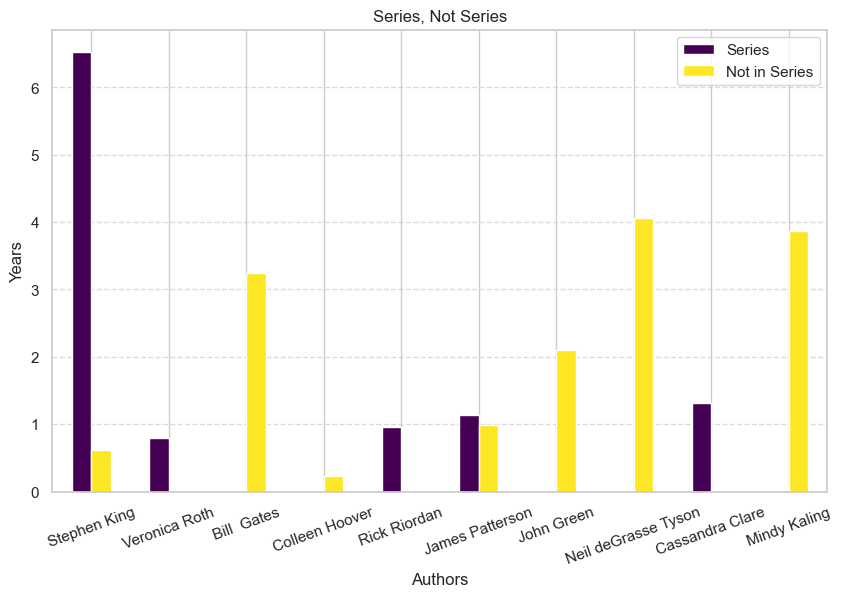

In [147]:
ax = total_time_gap_df.plot(kind='bar', rot=20, colormap="viridis", figsize=(10, 6))
plt.title("Series, Not Series")
plt.xlabel("Authors")
plt.ylabel("Years")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [186]:
total_series_mean = total_time_gap_df['Series'].mean()
total_not_series_mean = total_time_gap_df['Not in Series'].mean()

print(f'Total series time gap mean(years): {round(total_series_mean, 3)}' + '\n' + f'Total not series time gap mean(years): {round(total_not_series_mean, 3)}')


Total series time gap mean(years): 2.15
Total not series time gap mean(years): 2.159


We can say that the mean time gap for both series books and not series book are the almost the same.

There are too many Nones in the dataset, so we can't make any conclusions about the average time gap between two subsequent publications for a series of books and those not belonging to a series for top 10 authors.These None values means that some authors don'h have any series of books or books that are not part of a series. Also, it can be that some books were filtered out during the data cleaning process, as they have inappropriate values in the publication year column.


However, for better understanding of the data, we can take only those authors who have series of books and books that are not part of a series.

In [176]:
top40_authors = authors.sort_values('fans_count', ascending=False).head(40)


In [177]:
total_time_gap_40 = {}
for id in tqdm(top40_authors.id.values):
    name = top40_authors[top40_authors['id'] == id].name.values[0]
    total_time_gap_40[name] = [series_time_gap(id), not_series_time_gap(id)]

total_time_gap_40

100%|██████████| 40/40 [00:27<00:00,  1.43it/s]


{'Stephen King': [6.53, 0.61],
 'Veronica Roth': [0.8, None],
 'Bill  Gates': [None, 3.25],
 'Colleen Hoover': [None, 0.23],
 'Rick Riordan': [0.96, None],
 'James Patterson': [1.14, 0.99],
 'John Green': [None, 2.1],
 'Neil deGrasse Tyson': [None, 4.06],
 'Cassandra Clare': [1.32, None],
 'Mindy Kaling': [None, 3.87],
 'Patrick Rothfuss': [2.86, None],
 'J.K. Rowling': [1.42, 5.76],
 'Nicholas Sparks': [4.91, 1.27],
 'Diana Gabaldon': [4.23, None],
 'Sarah J. Maas': [0.77, None],
 'Wil Wheaton': [None, None],
 'Brandon Sanderson': [2.27, 4.5],
 'Maggie Stiefvater': [1.67, None],
 'Kristin Hannah': [None, 1.77],
 'Khaled Hosseini': [None, 2.99],
 'Rainbow Rowell': [None, 0.45],
 'Felicia Day': [None, 2.04],
 'Roxane Gay': [None, 0.31],
 'Chuck Palahniuk': [1.97, 1.62],
 'Marie Lu': [0.98, None],
 'Paulo Coelho': [2.38, 1.28],
 'Lauren Oliver': [1.04, 1.72],
 'Sylvia Day': [0.48, None],
 'David Baldacci': [1.58, 1.96],
 'L.J. Smith': [2.65, None],
 'Marissa Meyer': [0.96, None],
 'Mitch

In [179]:
total_time_gap_40_df = pd.DataFrame(total_time_gap_40).transpose().rename(columns={0: 'Series', 1: 'Not in Series'})

total_time_gap_40_df.dropna(inplace=True)

In [180]:
total_time_gap_10_df = total_time_gap_40_df[:10]

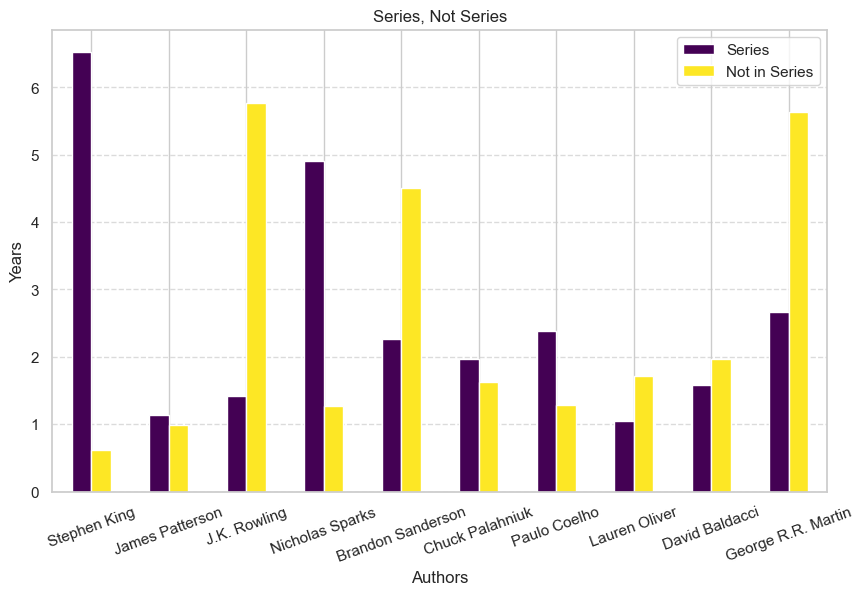

In [181]:
ax = total_time_gap_10_df.plot(kind='bar', rot=20, colormap="viridis", figsize=(10, 6))
plt.title("Series, Not Series")
plt.xlabel("Authors")
plt.ylabel("Years")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [183]:
total_series_mean = total_time_gap_10_df['Series'].mean()
total_not_series_mean = total_time_gap_10_df['Not in Series'].mean()

print(f'Total series time gap mean(years): {round(total_series_mean, 3)}' + '\n' + f'Total not series time gap mean(years): {total_not_series_mean}')


Total series time gap mean(years): 2.591
Total not series time gap mean(years): 2.534


Here we can see that the mean time gap for both series books and not series book are the almost the same.

### 6.2
For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [191]:
def plot_books_published(author_id):
    books_author = books[(books['author_id'] == author_id) & 
                        (books['format'] == 'Hardcover') & 
                        (books['language'] == 'eng')].copy()

    books_author = books_author.drop_duplicates(subset=['title'], keep='first')

    books_author = books_author.dropna(subset=['publication_date'])

    books_author['publication_date'] = pd.to_datetime(books_author['publication_date'], format='%Y-%m-%d')
    books_author = books_author.sort_values('publication_date', ascending=True)

    books_author['year'] = books_author['publication_date'].dt.year

    books_author['year'].value_counts().sort_index().plot(kind='bar', rot=45, colormap="viridis", figsize=(10, 6))
    plt.title(f"{books_author.author_name.values[0]}:Books Published")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

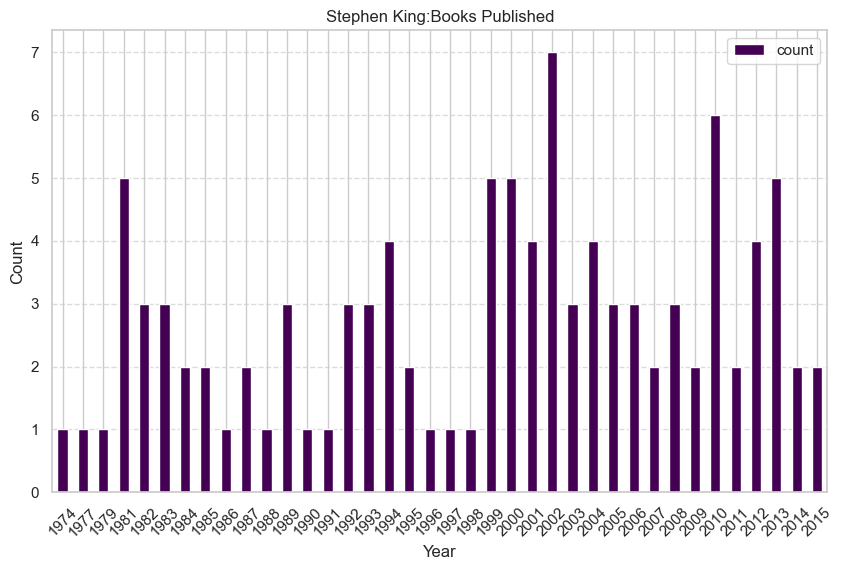

 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

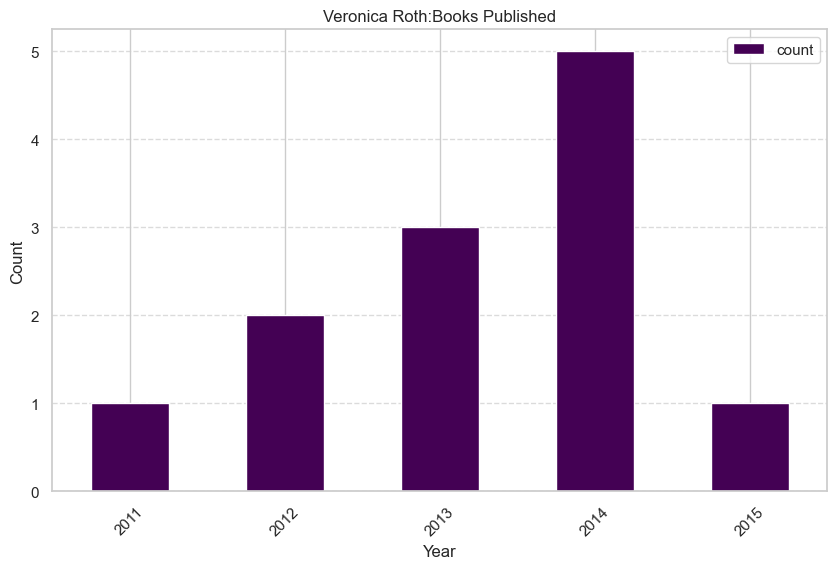

 20%|██        | 2/10 [00:00<00:03,  2.07it/s]

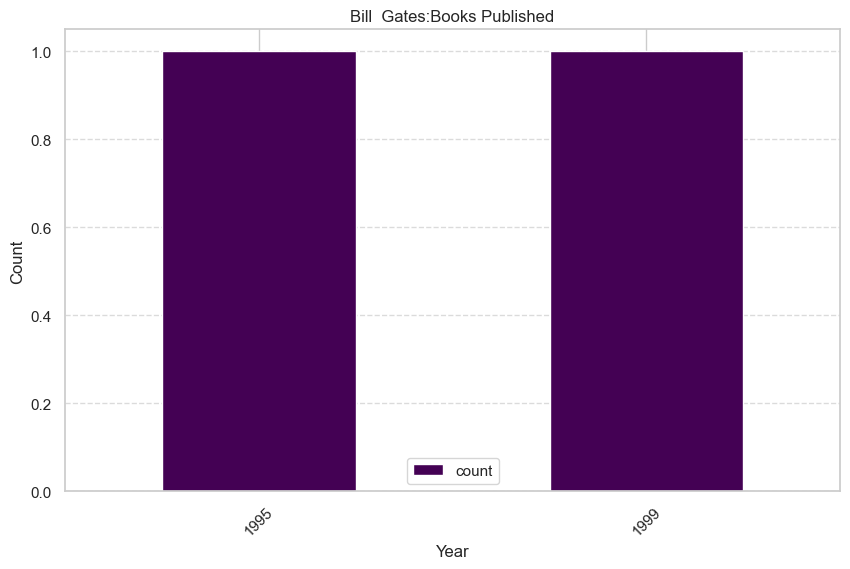

 30%|███       | 3/10 [00:01<00:03,  2.20it/s]

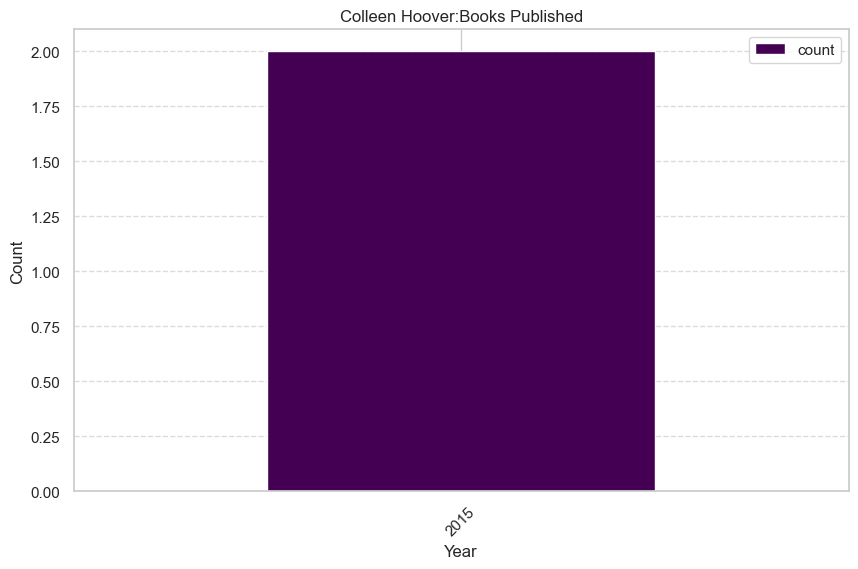

 40%|████      | 4/10 [00:01<00:02,  2.26it/s]

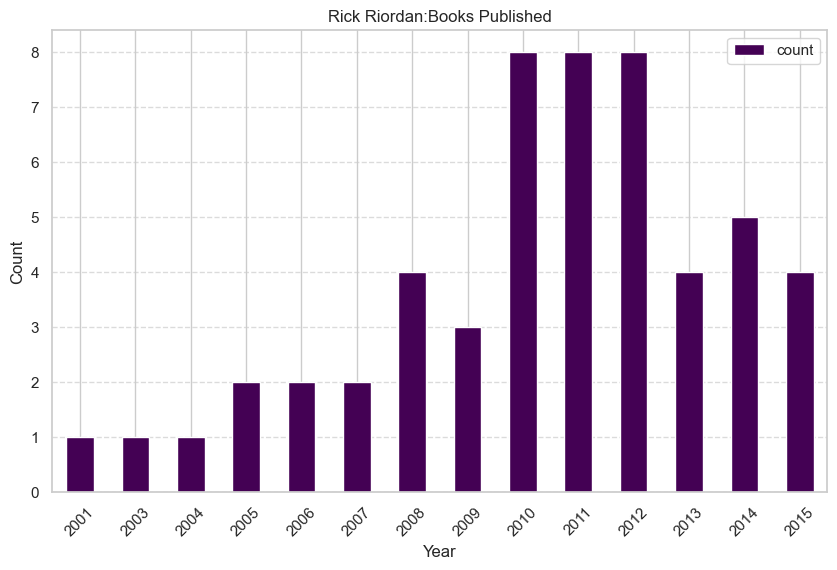

 50%|█████     | 5/10 [00:02<00:02,  2.22it/s]

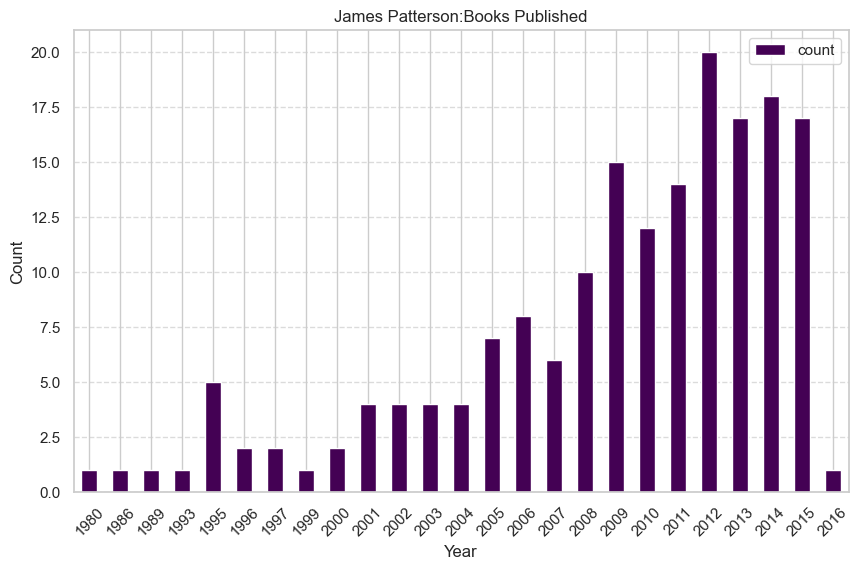

 60%|██████    | 6/10 [00:02<00:01,  2.11it/s]

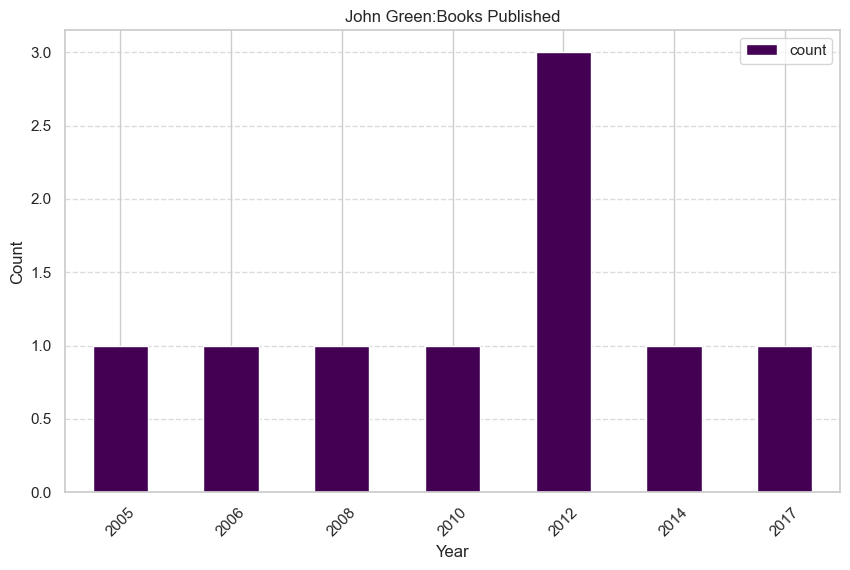

 70%|███████   | 7/10 [00:03<00:01,  2.17it/s]

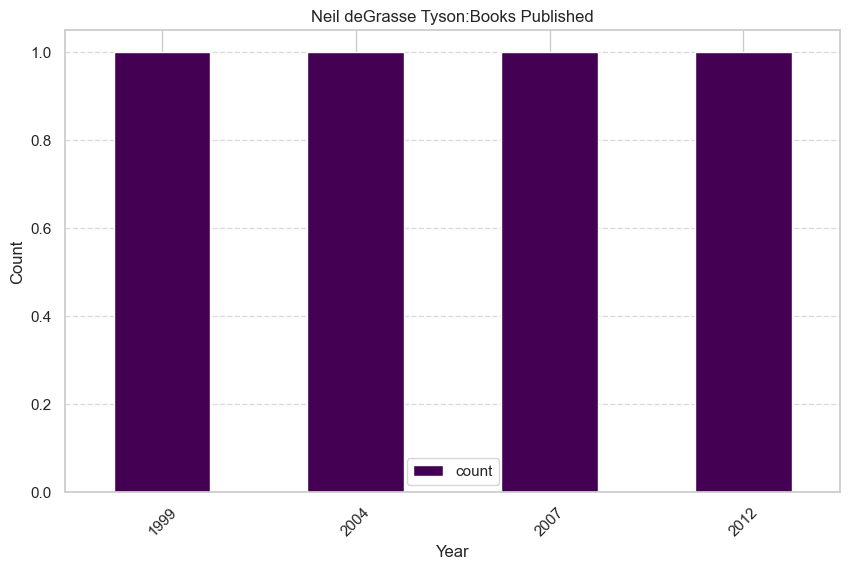

 80%|████████  | 8/10 [00:03<00:00,  2.22it/s]

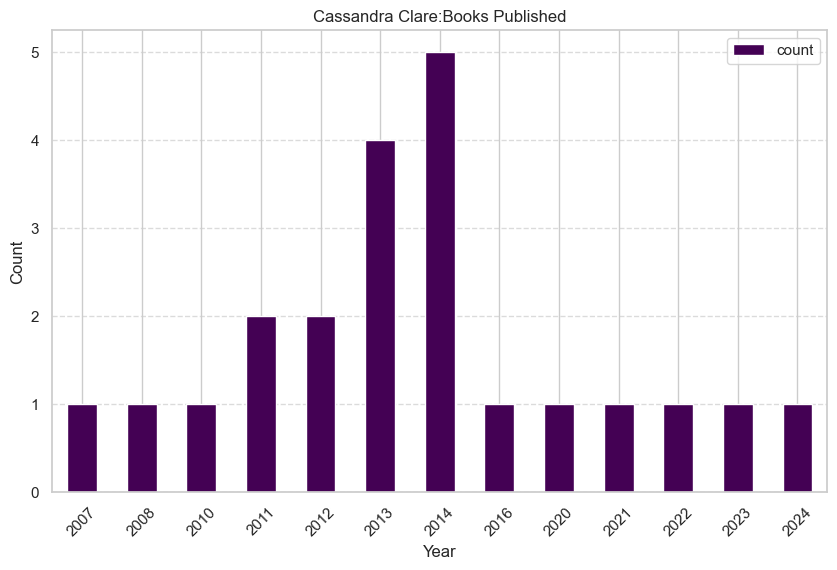

 90%|█████████ | 9/10 [00:04<00:00,  2.21it/s]

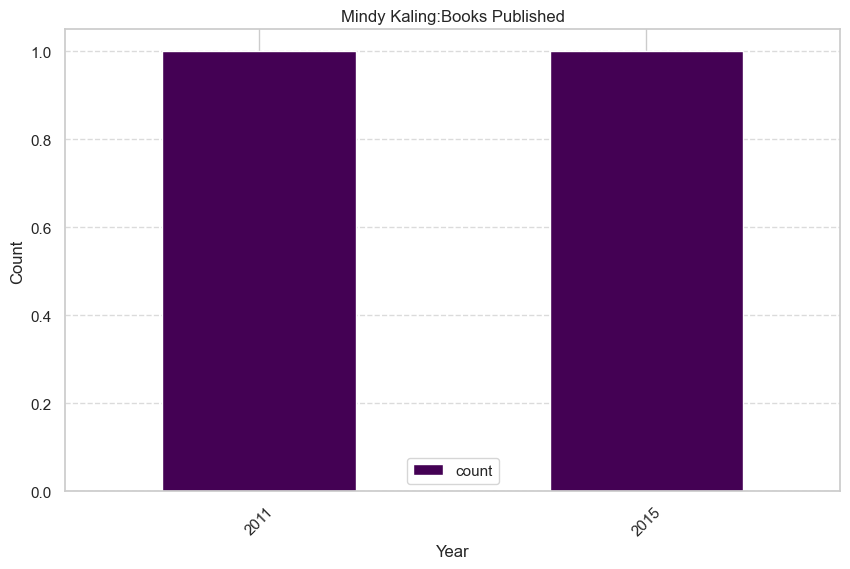

100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


In [193]:
for id in tqdm(top10_authors.id.values):
    plot_books_published(id)

We can notice that the authors are not contemporary with each other. The production rate of each author is different. Stephen King has the highest production rate, and he has published more than 100 books. The production rate of other authors is much lower. Also, we can notice that the production rate for Rick Riordan and James Patterson started to increase every year after 2009.
